In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [4]:
df=pd.read_csv("data.csv")
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [3]:
df.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [4]:
(df.isnull().sum()/170653 )#isnull with ratio

valence             0.0
year                0.0
acousticness        0.0
artists             0.0
danceability        0.0
duration_ms         0.0
energy              0.0
explicit            0.0
id                  0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
loudness            0.0
mode                0.0
name                0.0
popularity          0.0
release_date        0.0
speechiness         0.0
tempo               0.0
dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [6]:
df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [7]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

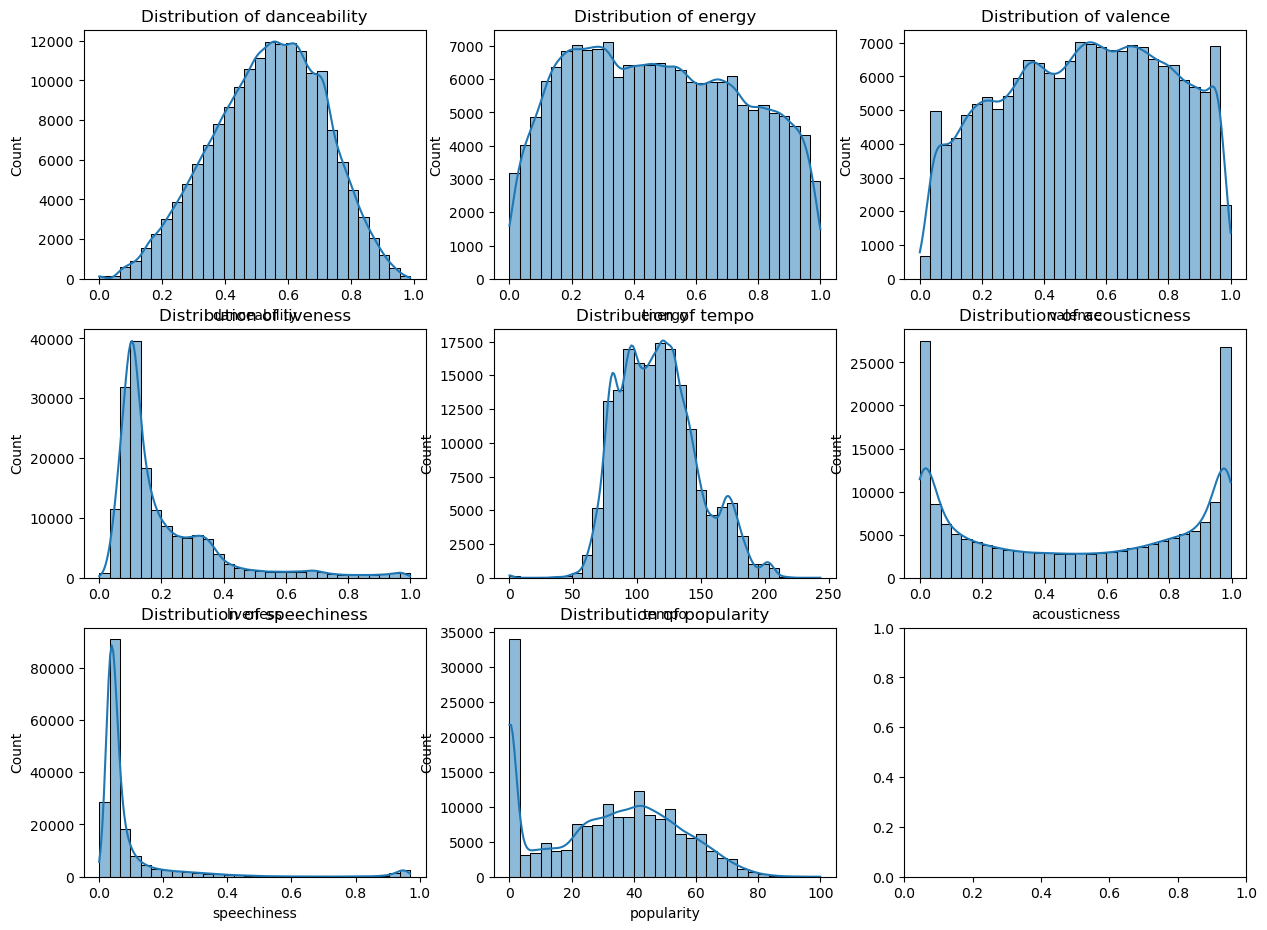

In [8]:
fig, ax = plt.subplots(3, 3, figsize=(15, 11))
cols = ['danceability', 'energy', 'valence', 'liveness', 'tempo', 'acousticness', 'speechiness', 'popularity']
for i, col in enumerate(cols):#returns both the index (i) and the column name (col).
    sns.histplot(df[col], bins=30, kde=True, ax=ax[i//3, i%3])#places the plot in the correct subplot.
    ax[i//3, i%3].set_title(f"Distribution of {col}")

duration_ms            Axes(0.125,0.712609;0.168478x0.167391)
instrumentalness    Axes(0.327174,0.712609;0.168478x0.167391)
danceability        Axes(0.529348,0.712609;0.168478x0.167391)
loudness            Axes(0.731522,0.712609;0.168478x0.167391)
speechiness            Axes(0.125,0.511739;0.168478x0.167391)
tempo               Axes(0.327174,0.511739;0.168478x0.167391)
dtype: object

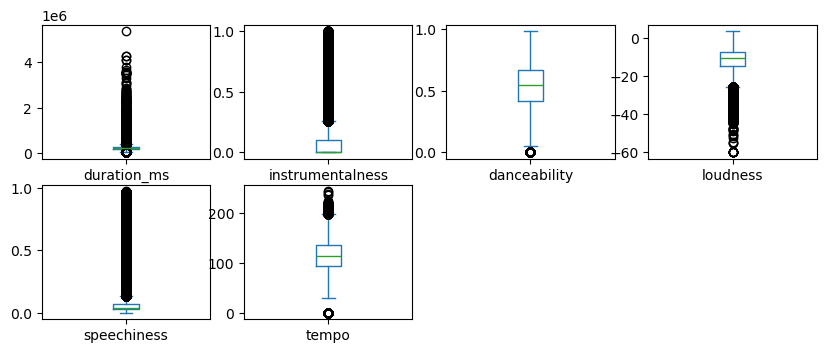

In [9]:
df[['duration_ms','instrumentalness','danceability','loudness','speechiness','tempo']].plot(kind='box', subplots=True, layout=(4,4), figsize=(10,8))

In [10]:
columns=['duration_ms','instrumentalness','danceability','loudness','speechiness','tempo']

In [11]:
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1
# Defining lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

duration_ms            Axes(0.125,0.712609;0.168478x0.167391)
instrumentalness    Axes(0.327174,0.712609;0.168478x0.167391)
danceability        Axes(0.529348,0.712609;0.168478x0.167391)
loudness            Axes(0.731522,0.712609;0.168478x0.167391)
speechiness            Axes(0.125,0.511739;0.168478x0.167391)
tempo               Axes(0.327174,0.511739;0.168478x0.167391)
dtype: object

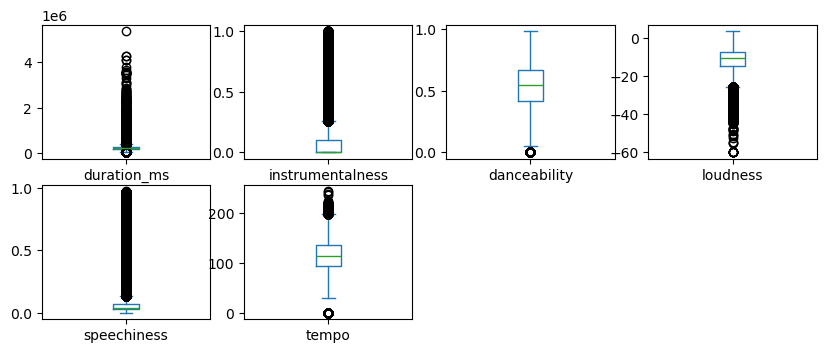

In [12]:
df[['duration_ms','instrumentalness','danceability','loudness','speechiness','tempo']].plot(kind='box', subplots=True, layout=(4,4), figsize=(10,8))

In [13]:
df.shape, df_cleaned.shape

((170653, 19), (107098, 19))

In [14]:
df=df_cleaned.copy()

In [15]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year  # Extract year

In [16]:
df.head(400)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,release_year
3,0.165,1921,0.9670,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921-01-01,0.0354,100.109,1921
4,0.253,1921,0.9570,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921-01-01,0.0380,101.665,1921
5,0.196,1921,0.5790,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.697,395076,0.346,0,4pyw9DVHGStUre4J6hPngr,0.168000,2,0.1300,-12.506,1,Gati Mardika,6,1921-01-01,0.0700,119.824,1921
6,0.406,1921,0.9960,['John McCormack'],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.1150,-10.589,1,The Wearing of the Green,4,1921-01-01,0.0615,66.221,1921
8,0.721,1921,0.9960,['Ignacio Corsini'],0.485,161520,0.130,0,05xDjWH9ub67nJJk82yfGf,0.151000,5,0.1040,-21.508,0,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678,1921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,0.473,1927,0.9720,['Jimmie Rodgers'],0.664,177627,0.543,0,4Qd1Z8cEtk9OvRrEsrOnPm,0.000000,1,0.3200,-4.933,0,Train Whistle Blues,2,1927-01-01,0.0374,110.225,1927
1044,0.610,1927,0.0166,['Paul Bridgwater'],0.425,353920,0.585,0,018RC89xBtF7MOTOmBG2Ml,0.001540,2,0.0735,-9.777,1,Sad Song,0,1927-01-01,0.0321,168.543,1927
1046,0.520,1927,0.0965,['Sexteto Habanero'],0.551,176588,0.700,0,01j1U4wO3hVwJdCo9Xg2Bi,0.000000,6,0.2730,-13.202,0,La Maldita Timidez - Remastered,0,1927-01-12,0.0504,127.292,1927
1048,0.241,1927,0.9050,['Damia'],0.340,192053,0.213,0,03YtLgMnq3eMufe12Mby0O,0.000015,5,0.0574,-12.556,0,La Rue De La Joie,0,1927-01-01,0.0407,90.351,1927


In [17]:
scaler = MinMaxScaler()
numerical_cols = ['danceability', 'energy', 'valence', 'liveness', 'tempo', 
                  'acousticness', 'speechiness', 'popularity']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

<IPython.core.display.Javascript object>

In [18]:
encoder = LabelEncoder()
df['mode'] = encoder.fit_transform(df['mode'])
df['key'] = encoder.fit_transform(df['key'])

<IPython.core.display.Javascript object>

In [19]:
nn_model = NearestNeighbors(n_neighbors=10, metric='cosine')
nn_model.fit(df[numerical_cols + ['mode', 'key']])##These features are used to find the nearest neighbors of a song

NearestNeighbors(metric='cosine', n_neighbors=10)

In [20]:
def recommend_songs(song_name, df, model, scaler):
    if song_name not in df['name'].values:
        return "Song not found in dataset. Try another song."
    #shows the index of the song
    song_index = df[df['name'] == song_name].index[0]
    ##Selects the numerical features along with 'mode' and 'key' for the song.
    song_features = df.loc[song_index, numerical_cols + ['mode', 'key']].values.reshape(1, -1)
    song_features_df = pd.DataFrame(song_features, columns=numerical_cols + ['mode', 'key'])
    song_vector = scaler.transform(song_features_df[numerical_cols])  # Only scale numerical features
    # Replace the original numerical features with the scaled ones
    song_features_df[numerical_cols] = song_vector
    # Extracting the normalized features and the original 'mode' and 'key' columns
    song_features_normalized = song_features_df[numerical_cols + ['mode', 'key']].values
    # it find the nearest neighbors using the model
    distances, indices = model.kneighbors(song_features_normalized)
    recommended_songs = df.iloc[indices[0][1:]]['name'].tolist()
    return recommended_songs

In [44]:
song_to_search = "Shape of You"
recommendations = recommend_songs(song_to_search, df, nn_model, scaler)
print("Recommended Songs:\n", recommendations)

Recommended Songs:
 ['Bloody Well Right', 'All The Shine', 'Squidrific', 'The Pressure', 'Hey There (feat. Future)', 'Meri Achhi Bhabhi Ne', 'How Many Drinks?', 'Willow Weep For Me', 'The Hills - Remix']


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
